<a href="https://colab.research.google.com/github/Adeelzafar/My-Version-of-Fastai-Course/blob/main/CustomDataset_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2   


In [2]:
!pip install -Uqq fastbook
import fastbook   
fastbook.setup_book()

In [3]:
from fastbook import *

In [4]:
from nbdev.showdoc import *

set_seed(2)

In [5]:
from fastai.vision import *

In [10]:
path = "/content/gdrive/MyDrive/Rock-Paper-Scissors/"
train_path = "/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper"

fns= get_image_files(train_path)


In [11]:
fns

(#840) [Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-047.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-043.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-038.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-042.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-041.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-040.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-037.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-036.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-034.png'),Path('/content/gdrive/MyDrive/Rock-Paper-Scissors/train/paper/paper01-035.png')...]

In [12]:
test_folder='/content/gdrive/My Drive/Rock-Paper-Scissors/test'

In [13]:
classes = []
for dirname,_,_ in os.walk(test_folder):
    name = dirname.split('/')[-1].strip() 
    if (name != 'test'):
        classes.append(name)

print(classes[:3])
print("Number of classes : ", len(classes))

['scissors', 'rock', 'paper']
Number of classes :  3


In [14]:
img_path =  get_image_files(test_folder)
img_path[:3]

(#3) [Path('/content/gdrive/My Drive/Rock-Paper-Scissors/test/scissors/testscissors01-15.png'),Path('/content/gdrive/My Drive/Rock-Paper-Scissors/test/scissors/testscissors01-08.png'),Path('/content/gdrive/My Drive/Rock-Paper-Scissors/test/scissors/testscissors01-07.png')]

In [15]:
db = DataBlock (
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(256)
)

In [16]:
dls = db.dataloaders(test_folder)

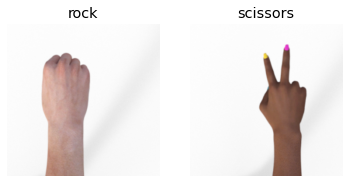

In [17]:
dls.valid.show_batch(max_n=2, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.134683,0.576190,0.648649,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.030809,0.219195,0.891892,00:05
1,0.018864,0.009587,1.000000,00:05
2,0.014337,0.003446,1.000000,00:05
3,0.011187,0.003544,1.000000,00:05
